# <p style="text-align:center;"> Machine Learning & Statistics- Assessment 2019</p>

# <p style="text-align:center;"> The Boston House Price Dataset</p>

## <font color=red> Setting up the environment</font>

In [33]:
import pandas as pd #import the pandas library for DataFrames
import numpy as np #import the numpy library for numerical arrays
import matplotlib.pyplot as plt #import the matplot library
import seaborn as sns #import seaborn library
import scipy as sp #import scipy
from sklearn.datasets import load_boston #load the boston house price index from the sklearn library
from string import ascii_letters #from the string module import concatenation of the ascii upper & lower constants[3]
import scipy.stats as ss #from scipy import the statistics module
from matplotlib import figure
from pylab import rcParams
import keras as kr # For neural networks
import sklearn.preprocessing as pre # For preprocessing data.
import sklearn.model_selection as mod # For splitting data sets.
import sklearn.decomposition as dec # For data whitening.

In [2]:
#rename the load_boston dataset to boston_dataset
#create a pandas dataframe from the dataset and call it boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [3]:
#Add the MEDV to the dataset
boston['MEDV'] = boston_dataset.target 

In [4]:
# The DataFrame
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


<h3 style="text-align: center;"> The Datasets Variables</h3>


|s.No |Attributes     |Description                                                         |
|----:---------------:-------------------------------------------------------------------:-
|1.   |CRIM           |per capita crime rate by town                                       |
|2.   |ZN             |the proportion of residential land zoned for lots over 25,000 sq.ft.|
|3.   |INDUS          |the proportion of non-retail business acres per town                |
|4.   |CHAS           |Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
|5.   |NOX            |nitric oxides concentration (parts per 10 million)                  |
|6.   |RM             |the average number of rooms per dwelling                            |
|7.   |AGE            |the proportion of owner-occupied units built prior to 1940          |
|8.   |DIS            |weighted distances to five Boston employment centres                |
|9.   |RAD            |index of accessibility to radial highways                           |
|10.  |TAX            |full-value property-tax rate per 10,000                             |
|11.  |PTRATIO        |the pupil-teacher ration by the town                                |
|12.  |B-1000(BK-0.63)|Where Bk is the proportion of blacks by the town                    | 
|13.  |LSTAT          |percentage lower status of the population                           |
|14.  |MEDV           |the median value of owner-occupied homes in  1000's                 |


The dataset variables can be categorised as follows :<br>

**Dependent**<br>
<br>
*target*<br>
The median value of owner-occupied houses.<br>
<br>
**Structural**<br>
<br>
*RM*<br>
The average number of rooms in owner units, it represents spaciousness and can also represent a better quality home.<br>
<br>
*AGE*<br>
This represents the proportion of houses completed before 1940.<br>
<br>
**Area**<br>
<br>
*B*<br>
This variable indicates the black proportion of the population. In 1970 you would expect where an increase in B exists would have a negative impact on house value.<br>
<br>
*LSTAT*<br>
Proportion of adults without some high-school education and proportion of male workers classified as labourers.<br>
<br>
*CRIM*<br>
Crime rate by town. We would expect that high levels of this variable would have an negative impact on prices.<br>
<br>
*ZN*<br>
Proportion of town's residential land zoned for units over 25,000 sq ft. As this restricts the construction of small lot houses, we would expect to see a positive correlation with the median value.<br>
<br>
*INDUS*<br>
This variable is the proportion of nonretail business acres per town. Noise and heavy traffic should negatively effect the house values.<br>
<br>
*TAX*<br>
Full value property tax rate ($10,000). It measures the cost of public services in each community.<br>
<br>
*PTRATIO*<br>
Measures public sector benefits in each town. A low ration should imply that each student receives more individual attention.<br>
<br>
*CHAS*<br>
This variable captures the amenities of a riverside location and therefore the coefficient should be positive.<br>
<br>
**Accessibility**<br>
<br>
*DIS*<br>
Weighted distance to 5 employment centres in the Boston region. House prices *should* be higher the nearer they are to employment centres.<br>
<br>
*RAD*<br>
The highway access index was calculate on a town basis.<br>
<br>
**Air Pollution**<br>
<br>
*NOX*<br>
Nitrogen oxide concentration in pphm (annual average concentration in parts per hundred million).<br>
<br> 


# <font color=red> Interesting Highlights</font>

<p> I was interested to investigate if there was a pattern in relation to the median house values. As you can see from the bar chart below, it is clear that the median value of the house prices are normally distributed, half of the values fall to the left of the mean and half are to the right.</p>
<p>
It is worth noting that the variable **target** appears to be censored at 50.00. Censoring is suggested by the fact that in 16 instances, the median value is exactly €50,000, while there are 15 instances have a prices between €40,000 - €50,000 [2].
</p>

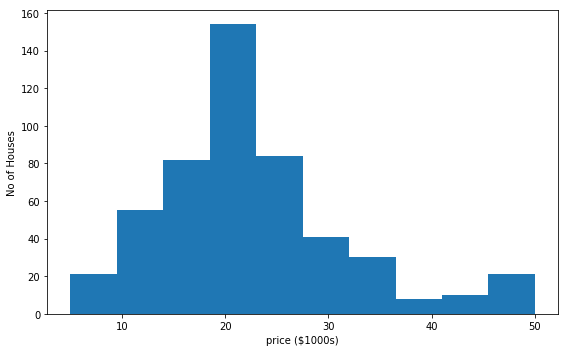

In [5]:
#Generate a histogram detailing the count of houses in each range
plt.figure(figsize=(8, 5))
plt.hist(boston_dataset.target)
plt.xlabel('price ($1000s)')
plt.ylabel('No of Houses')
plt.tight_layout()
plt.show()

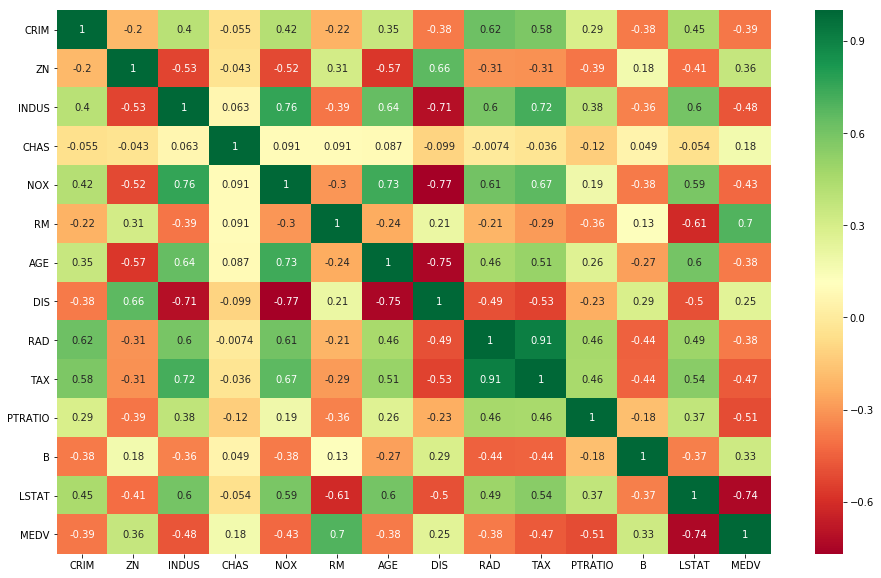

In [5]:
# A heatmap of all of the variables in the dataset
ax, fig = plt.subplots(figsize = (16, 10))
sns.heatmap(boston.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

<p>The heat map highlights the attributes that are closely correlated, and those that display little or no correlation at all. Correlation can be described as the degree of association between two variables</p> 
<p>The most attributes most closely linked to the median house price are average rooms per house and LSTAT- Proportion of adults without some high-school education and proportion of male workers classified as labourers. Neither of these are surprising as we would expect the number of rooms. Again it is not surprising to see that areas where the population have no high-school education live in less expensive than those who achieved a higher level of education. </p> 
<p>
It is easy to identify that houses that bound the river, or not, has the least correlation with all of the other attributes. The closer an attribute is to 0 indicates no correlation. At 0.0074 the distance to employment centres has the least impact on house prices. The strength of the linear relationship between index of accessibility to radial highways and full-value property tax-rate are the attributes is very strong at 0.91.
</p>

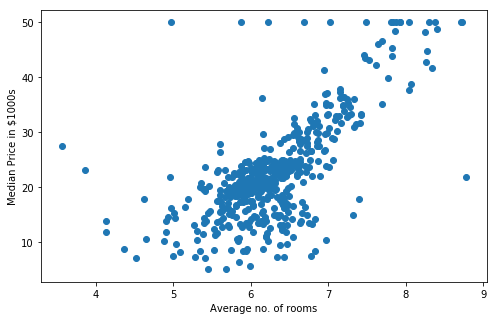

In [6]:
# A scatter plot visualising all of the data points of number of rooms in the property and their corresponding house price
plt.figure(figsize=(8, 5))
plt.scatter(boston_dataset.data[:,5], boston_dataset.target)
plt.xlabel('Average no. of rooms')
plt.ylabel('Median Price in $1000s')
plt.show()

The scatter plot above clearly shows that the as the number of rooms increases the price of the house increases. This graphic also indicates that the vast majority of houses have been 5.5 and 6.5 rooms per house. We can also determine that a house with 6 rooms would likely sell for around $20,000.

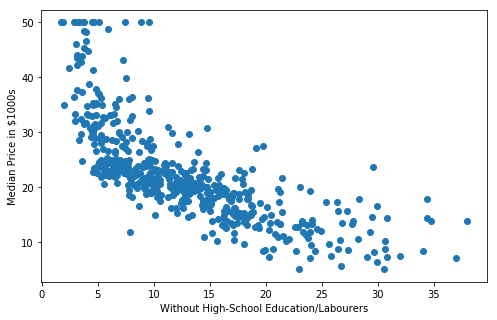

In [6]:
# A scatter plot visualising the price of the property and the proportion of the residents without high-school education
plt.figure(figsize=(8, 5))
plt.scatter(boston_dataset.data[:,12], boston_dataset.target)
plt.xlabel('Without High-School Education/Labourers')
plt.ylabel('Median Price in $1000s')
plt.show()

It is not surprising to see learn that areas where a high proportion of the residents have a low level of education or low skilled jobs live in less expensive houses than those areas where residents have achieved a high level of high-school education.

## Environmental impacts

I think it would be interesting to investigate if there is any correlation between the median house value and the environmental variables recorded in the dataset. I will look at the nitric oxides as well as the proximity of houses to employment centres and accessibility of highways. I believe these variables will impact on air and noise quality which could influence house prices.

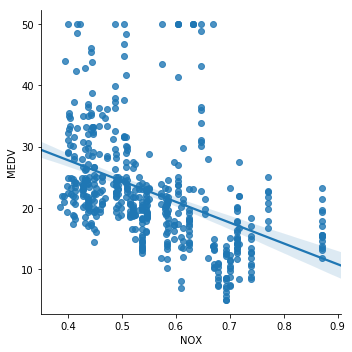

In [7]:
sns.lmplot('NOX','MEDV',boston)
plt.show()

The above graph confirms that there is a direct negative linear relationship between the house price and the level of nitric oxides recorded in the town. We can see that as the levels increase above 0.6 parts per 10 million, the value of the house is at the lower end of scale.

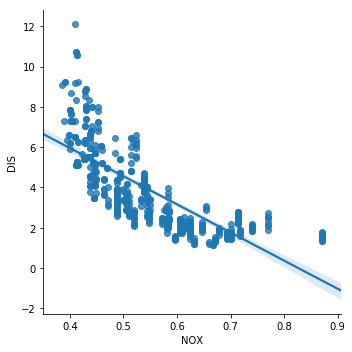

In [8]:
sns.lmplot('NOX','DIS',boston)
plt.show()

From the above graph we can tell that the closer the house is to a business center the higher the levels of nitic oxides.

# <font color=red><p style="text-align:center;">Prices along the Charles River</p></font>

<img src="River.png" width="600">

In [8]:
boston['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

<p>As we can see from the above tables, the vast majority (93%) of the 506 listings in the dataset did not tract the river. I grouped the means of all variables split by properties that tract the river against those that did not, this meant that there was a large disparity in median values for each category- 28.44 was the median value for properties that faced the river and 22.09 for those that did not tract the river.</p>
<p> Crime rates are also considerably lower in houses that face the river. The data would also suggest that the amenity of the river is the primary factory that drives the higher median value as the number of rooms per dwelling is only marginally higher for properties facing the river and these properties are on average 12% older that those properties that do not tract the river.</p>


In [13]:
boston.groupby('CHAS').mean().round()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CHAS,,,,,,,,,,,,,
0.0,4.0,12.0,11.0,1.0,6.0,68.0,4.0,10.0,410.0,19.0,355.0,13.0,22.0
1.0,2.0,8.0,13.0,1.0,7.0,78.0,3.0,9.0,386.0,17.0,373.0,11.0,28.0


In [9]:
# calculate the t-test means of the two independent samples, in this case the house 
ss.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [67]:
#create a new Dataframe with just the median house value and the River Facing Prooperties
old = pd.DataFrame(boston)
new = old[['CHAS', 'MEDV']].copy()

In [123]:
Facing = boston[['CHAS', 'MEDV']]

In [127]:
# Create two new DataFrames spliting the categories into those that face the river and those properties that do not
Facing = new[new.CHAS == 1]
NotFacing = new[new.CHAS == 0]

In [128]:
# The new DataFrame containing the median house price for those properties facing the river
Facing

,CHAS,MEDV
142,1.0,13.4
152,1.0,15.3
154,1.0,17.0
155,1.0,15.6
160,1.0,27.0
162,1.0,50.0
163,1.0,50.0
208,1.0,24.4
209,1.0,20.0
210,1.0,21.7


In [104]:
# The new DataFrame containing the median house price for those properties not facing the river
NotFacing

,CHAS,MEDV
0,0.0,24.0
1,0.0,21.6
2,0.0,34.7
3,0.0,33.4
4,0.0,36.2
...,...,...
501,0.0,22.4
502,0.0,20.6
503,0.0,23.9
504,0.0,22.0


In [105]:
ss.ttest_ind(Facing,NotFacing)

Ttest_indResult(statistic=array([       inf, 3.99643747]), pvalue=array([0.00000000e+00, 7.39062317e-05]))

In [106]:
ws.ttest_ind(Facing,NotFacing)

C:\Users\Ger\Ana\lib\site-packages\statsmodels\stats\weightstats.py:617: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


(array([       inf, 3.99643747]),
 array([0.00000000e+00, 7.39062317e-05]),
 504.0)

Given the p-value of **7.39062317e-05**, we can reject the null hypothesis, that the median house prices are equal, and therefore assume a significant difference in median house prices between houses that are along the Charles river and those that are not along the river.

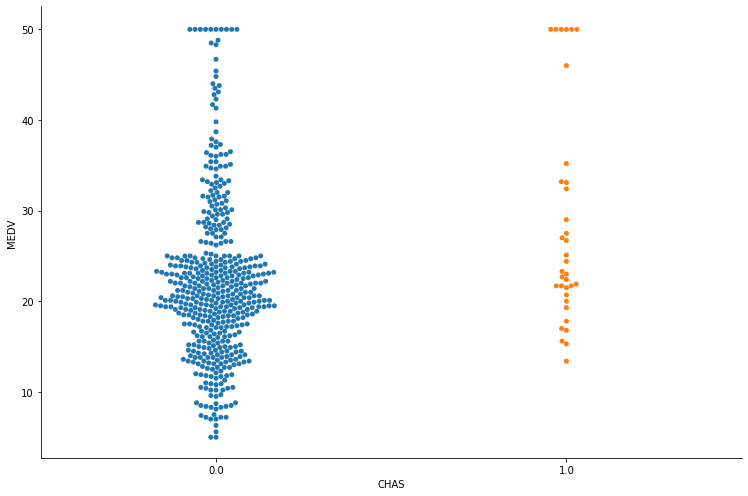

In [122]:
sns.catplot(x='CHAS', y='MEDV', height=7, aspect=1.5, data=boston, kind='swarm') 

The swarm plot above visually describes where the houses that face the river and those that do not fall on the price scale. It is clear to see that there are significantly more data points for those houses that do not tract the river, and a lot of those houses are priced around the median price range between 20,000 and 25,000 dollars. No house that faced the river cost less than 13,000 dollars. It is worth noting that 6 or 17% of the data points for houses that face the river cost $50,000 and this skews the average house price for this category. 

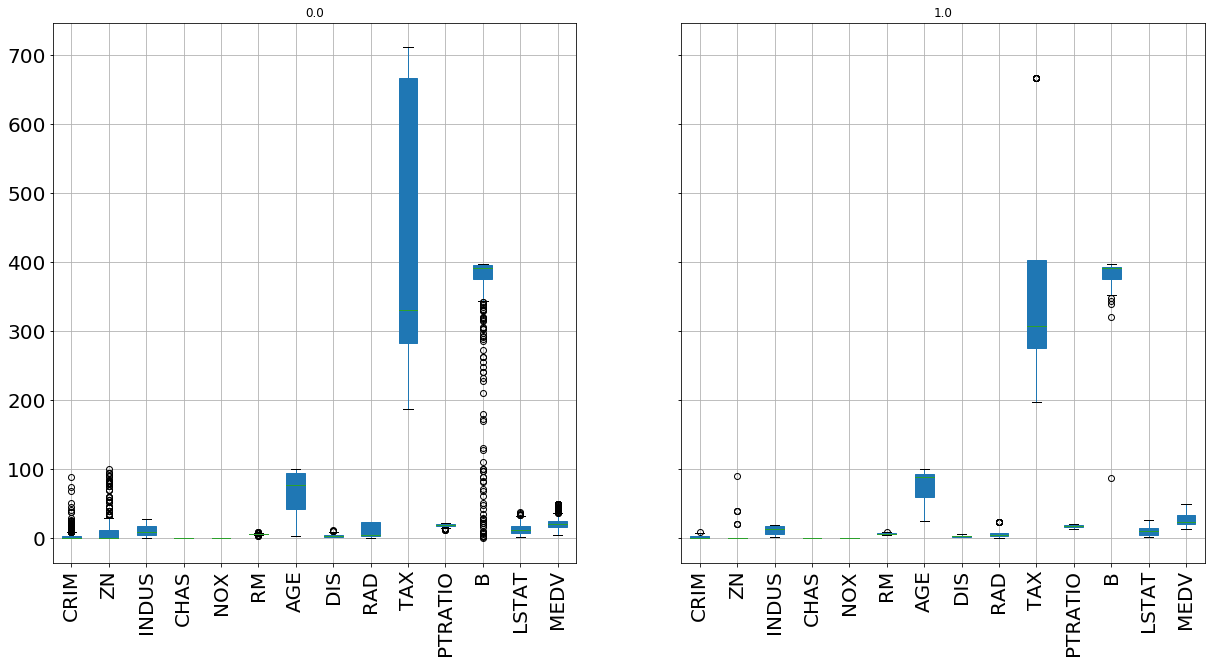

In [5]:
#https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4
boston.groupby('CHAS').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)
plt.show()

# Prediction

In [16]:
#http://www.neural.cz/dataset-exploration-boston-house-pricing.html
pearson = boston.corr(method='pearson')
corr_with_target = pearson.iloc[-1][:-1]
predictivity = corr_with_target.sort_values(ascending=False)

In [17]:
predictivity

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

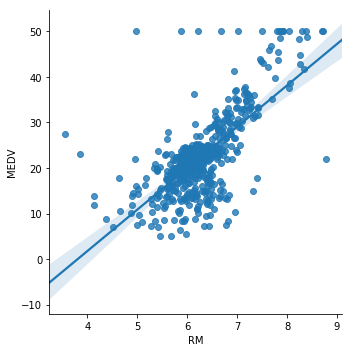

In [18]:
sns.lmplot("RM","MEDV",boston)
plt.show()

<p>As the RM(the average number of rooms per house) variable shows a linear upward relationship we will use this as a predictor for house values.</p>
<p> To do this we will use sk learn to calculate Y = MX + c. Where X is the independant variable, m represents the slope of the line. C is the constant error. M is the slope coef and C is the intercept.</p>

In [29]:
X = boston.data[:,np.newaxis,5]
Y = boston.target

In [35]:
from sklearn.linear_model import LinearRegression #import the linear Regression library from sklearn
linreg = LinearRegression() #initialise the function to pass on the fit and predict methods
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
linreg.intercept_ # this represents the "C" (constant error) part of the equation

-34.67062077643857

In [36]:
linreg.coef_ # this represents the "M" slope of the line

array([9.10210898])

In [33]:
linreg.predict(5.5) # use linreg to predict the house price on a given number of rooms

array([15.39097862])

Y = 9.102*5.5(5.5 rooms) - 34.67

In [21]:
9.102 * 5.5 - 34.67

15.390999999999998

We can see by looking at the plot above that the slope of 5.5 rooms is grouped around the $15,000 mark.

# Training the Model

<p>We will now attempt to train a neural network to fit our model. We will use the inputs (x) as catergorised in the below cell and try to replicate the house price output (y).A neural network takes in inputs, these are then processed in hidden layers using weights that are adjusted during the training phase, the model will then return a prediction. Weights are adjusted to find patterns in the hope of making better predictions [7].</p>
<p> Keras will be used to build our neural networks. Keras provides high-level application program interface and runs on Tensorflow which is the open source library.



In [23]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [24]:
boston['MEDV'] = boston_dataset.target 

In [25]:
x = boston.iloc[:,0:13] # assign all of the training data (with the exception of the target column)
y = boston.iloc[:,13] # assign the last column as y (this is the target column)

In the cell below, we will split the data into random train and test subsets, 30% of the values will be used as test data and the remaining 70% will be training data.

In [26]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.3)

<p>The sequential model allows us to create models layer by layer, it is the most straightforward way to build a model as it allows us to build the model layer by layer and each layer has weights that correspond to the laye that follows it.</p>
<p> In our model we will use the add() function, we will use two layers and an output layer. Dense is a standard layer, in this layer, all nodes in the previous layer connects in the current layer [7], we are using 20 nodesin each of our input layers.</p>
<p> The activation function allows models to handle nonlinear relationships, in our model I have used the Rectified Linear Activation and the Linear Activation. The input_dim relates to the number of columns in the dataset, excluding the target column. And finally, the last payer has one node which will be pur prediction.</p> 
<p> There are two parameters required for compiling the model, the loss and the optimizer.

In [53]:
m = kr.models.Sequential() # build the lyer of the nueral netowrk up sequentially

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear")) # We only want 1 output
#m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_logarithmic_error", optimizer="adam")

In [54]:
m.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
354/354 [==============================] - 0s 463us/step - loss: 6.1491
Epoch 2/100
354/354 [==============================] - 0s 133us/step - loss: 2.0220
Epoch 3/100
354/354 [==============================] - 0s 141us/step - loss: 1.3413
Epoch 4/100
354/354 [==============================] - 0s 150us/step - loss: 1.1379
Epoch 5/100
354/354 [==============================] - 0s 184us/step - loss: 1.0046
Epoch 6/100
354/354 [==============================] - 0s 172us/step - loss: 0.8430
Epoch 7/100
354/354 [==============================] - 0s 167us/step - loss: 0.4432
Epoch 8/100
354/354 [==============================] - 0s 215us/step - loss: 0.2276
Epoch 9/100
354/354 [==============================] - 0s 209us/step - loss: 0.1954
Epoch 10/100
354/354 [==============================] - 0s 186us/step - loss: 0.1746
Epoch 11/100
354/354 [==============================] - 0s 195us/step - loss: 0.1603
Epoch 12/100
354/354 [==============================] - 0s 181us/step - lo

354/354 [==============================] - 0s 427us/step - loss: 0.0728
Epoch 98/100
354/354 [==============================] - 0s 429us/step - loss: 0.0636
Epoch 99/100
354/354 [==============================] - 0s 336us/step - loss: 0.0659
Epoch 100/100
354/354 [==============================] - 0s 297us/step - loss: 0.0719


In [31]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))
#m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_logarithmic_error", optimizer="adam")

In [32]:
m.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
354/354 [==============================] - 0s 706us/step - loss: 238.2329
Epoch 2/100
354/354 [==============================] - 0s 141us/step - loss: 73.4241
Epoch 3/100
354/354 [==============================] - 0s 141us/step - loss: 70.4127
Epoch 4/100
354/354 [==============================] - 0s 198us/step - loss: 67.5062
Epoch 5/100
354/354 [==============================] - 0s 198us/step - loss: 66.7310
Epoch 6/100
354/354 [==============================] - 0s 198us/step - loss: 66.6987
Epoch 7/100
354/354 [==============================] - 0s 169us/step - loss: 63.0648
Epoch 8/100
354/354 [==============================] - 0s 198us/step - loss: 62.9666
Epoch 9/100
354/354 [==============================] - 0s 198us/step - loss: 64.8112
Epoch 10/100
354/354 [==============================] - 0s 201us/step - loss: 60.9819
Epoch 11/100
354/354 [==============================] - 0s 345us/step - loss: 64.8005
Epoch 12/100
354/354 [==============================] - 0s 169

354/354 [==============================] - 0s 311us/step - loss: 15.1282
Epoch 97/100
354/354 [==============================] - 0s 254us/step - loss: 15.1444
Epoch 98/100
354/354 [==============================] - 0s 226us/step - loss: 15.1393
Epoch 99/100
354/354 [==============================] - 0s 198us/step - loss: 14.1734
Epoch 100/100
354/354 [==============================] - 0s 198us/step - loss: 14.7031


In [38]:
m.predict(x_test).round().T

array([[33., 21., 22., 13., 26., 19., 20., 24., 21., 25., 34., 25., 26.,
        20., 27.,  9., 20., 19., 23., 24., 15., 21., 24., 20., 23., 37.,
        24., 24., 21., 12., 32., 23., 24., 13., 21., 21., 30., 13., 22.,
        23., 12., 17., 14., 37., 24., 17., 36., 19., 12., 21., 17., 37.,
        11., 30., 29., 28., 22., 23., 22., 25., 35., 32., 26., 22., 14.,
        20., 19., 20., 21., 21., 10., 43., 32., 21., 28., 35., 22., 23.,
        17., 27., 17., 20., 17., 37., 20., 14., 21., 21., 24., 32., 24.,
        25., 31., 19., 23., 39., 17., 24., 25., 27., 18., 41., 15., 40.,
        25., 15., 32., 24., 17., 21., 31.,  9., 25., 24., 19., 23., 20.,
        26., 26., 29., 26., 11., 23., 11., 17., 25., 13., 23., 38.,  9.,
        18., 17., 13., 37., 17., 36., 21., 22., 21., 44., 24., 22., 13.,
        18., 24., 27., 33., 23., 15., 21., 20., 21.]], dtype=float32)

In [56]:
y_test.as_matrix().astype(np.float32)

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([33.2, 23.5, 19.9, 18.2, 19.3, 13.6, 21.6, 42.8, 23.2, 21.7, 16.8,
       21.4, 44. , 19.8,  8.3,  9.7, 23.2, 50. , 15.6, 20.3, 15.2, 19.8,
       27.1, 15.4, 32.4, 23.1, 20.1, 35.4, 20.3, 24.7, 19.9, 23.3, 14.5,
       22.2, 28.4, 14.9, 23.2, 22.2, 22. , 23.3, 20.9, 36.2, 23.9,  8.8,
       19.1, 12.7, 18.6, 20.5, 21.2, 20.1, 19.9, 21.2, 13.3, 10.8, 12.7,
       16. , 11.8, 35.2, 37.3, 24.8, 30.1, 33.4, 11.5, 17.5, 31.1, 22. ,
       20.5, 36.2, 35.1, 26.6,  7. , 16.6, 42.3, 19.6, 29.1,  7.5, 11.8,
       24.5, 18.6, 13.1, 28.4, 13.5, 22.3, 37.9, 27.9, 20.7, 19.4, 17.8,
       13.5, 37.2, 18.9, 10.9, 13.8, 29.4, 21.7, 24.1, 20. ,  6.3,  7.2,
       23.1, 22.8, 12.3, 37.6, 23.9, 16.2, 20.2, 17.7, 14.3, 18.2, 31.7,
       26.4, 18.7,  8.1, 34.9, 22.2, 50. , 27.9, 18.1, 16.2, 22. , 23.1,
       50. , 22.6, 22.8, 17.2, 16.1, 18. , 33.1, 43.5, 30.7, 20.3, 23.1,
       17.1, 27. , 19.6, 19.2, 22.6, 19.1, 50. , 19.3, 20. , 18.2,  7.4,
       13.9, 25. , 43.1, 14.8, 25. , 23.9, 17.8, 19

In [57]:
m.evaluate(x_test, y_test)

152/152 [==============================] - 0s 434us/step


0.06005213801798068

# Scaling

In [58]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [59]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))
#m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_logarithmic_error", optimizer="adam")

In [73]:
m.fit(x_train_scaled, y_train, epochs=100, batch_size=10)

Epoch 1/100
354/354 [==============================] - 0s 254us/step - loss: 5.6356
Epoch 2/100
354/354 [==============================] - 0s 254us/step - loss: 2.8021
Epoch 3/100
354/354 [==============================] - 0s 226us/step - loss: 1.8707
Epoch 4/100
354/354 [==============================] - 0s 226us/step - loss: 1.3919
Epoch 5/100
354/354 [==============================] - 0s 198us/step - loss: 1.0935
Epoch 6/100
354/354 [==============================] - 0s 198us/step - loss: 0.8892
Epoch 7/100
354/354 [==============================] - 0s 169us/step - loss: 0.7406
Epoch 8/100
354/354 [==============================] - 0s 169us/step - loss: 0.6288
Epoch 9/100
354/354 [==============================] - 0s 226us/step - loss: 0.5417
Epoch 10/100
354/354 [==============================] - 0s 226us/step - loss: 0.4725
Epoch 11/100
354/354 [==============================] - 0s 198us/step - loss: 0.4172
Epoch 12/100
354/354 [==============================] - 0s 169us/step - lo

In [77]:
x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[37., 26., 19., 18., 21., 12., 28., 34., 26., 23., 18., 24., 34.,
        22., 12., 13., 17., 33., 18., 20., 16., 18., 17., 16., 29., 25.,
        25., 35., 23., 29., 17., 20., 14., 23., 31., 16., 16., 20., 29.,
        22., 21., 31., 21., 11., 12., 11., 12., 17., 19., 20., 15., 26.,
        14., 13., 14., 14., 12., 34., 28., 25., 27., 30., 15., 16., 34.,
        24., 22., 33., 35., 28.,  8., 15., 35., 17., 26., 12., 13., 19.,
        20., 17., 25., 11., 24., 37., 25., 22., 16., 18., 13., 37., 12.,
        10., 17., 32., 19., 26., 16., 13., 11., 16., 26., 15., 37., 28.,
        16., 18., 17., 15., 19., 32., 24., 15., 16., 29., 24., 28., 18.,
        17., 20., 22., 25., 40., 25., 28., 20., 17., 19., 29., 37., 27.,
        23., 23., 15., 27., 18., 21., 30., 20., 36., 19., 16., 16., 10.,
        14., 26., 33., 13., 23., 25., 12., 17., 21.]], dtype=float32)

In [78]:
y_test.as_matrix().astype(np.float32)

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([33.2, 23.5, 19.9, 18.2, 19.3, 13.6, 21.6, 42.8, 23.2, 21.7, 16.8,
       21.4, 44. , 19.8,  8.3,  9.7, 23.2, 50. , 15.6, 20.3, 15.2, 19.8,
       27.1, 15.4, 32.4, 23.1, 20.1, 35.4, 20.3, 24.7, 19.9, 23.3, 14.5,
       22.2, 28.4, 14.9, 23.2, 22.2, 22. , 23.3, 20.9, 36.2, 23.9,  8.8,
       19.1, 12.7, 18.6, 20.5, 21.2, 20.1, 19.9, 21.2, 13.3, 10.8, 12.7,
       16. , 11.8, 35.2, 37.3, 24.8, 30.1, 33.4, 11.5, 17.5, 31.1, 22. ,
       20.5, 36.2, 35.1, 26.6,  7. , 16.6, 42.3, 19.6, 29.1,  7.5, 11.8,
       24.5, 18.6, 13.1, 28.4, 13.5, 22.3, 37.9, 27.9, 20.7, 19.4, 17.8,
       13.5, 37.2, 18.9, 10.9, 13.8, 29.4, 21.7, 24.1, 20. ,  6.3,  7.2,
       23.1, 22.8, 12.3, 37.6, 23.9, 16.2, 20.2, 17.7, 14.3, 18.2, 31.7,
       26.4, 18.7,  8.1, 34.9, 22.2, 50. , 27.9, 18.1, 16.2, 22. , 23.1,
       50. , 22.6, 22.8, 17.2, 16.1, 18. , 33.1, 43.5, 30.7, 20.3, 23.1,
       17.1, 27. , 19.6, 19.2, 22.6, 19.1, 50. , 19.3, 20. , 18.2,  7.4,
       13.9, 25. , 43.1, 14.8, 25. , 23.9, 17.8, 19

In [80]:
m.evaluate(x_test_scaled, y_test)

152/152 [==============================] - 0s 132us/step


0.04057625504700761

# Whitening

In [65]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
x_train_white

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.806020,2.184061,0.460051,-0.552365,-0.726048,0.534848,-0.686070,-0.317540,-0.086086,-0.574408,-0.522640,-0.074686,0.146102
1,-0.844209,0.205739,-0.230520,0.534136,0.098775,-0.906631,-0.566333,-0.129932,-2.600085,-1.332355,-2.311479,-0.886210,0.406703
2,-1.085169,0.245447,-0.606820,-0.654038,0.239714,-1.209934,-0.837649,0.403152,0.698229,1.234181,0.446213,-0.217752,0.420142
3,1.399989,-0.860649,-0.200533,0.288498,0.640340,0.887133,-0.894312,-0.299229,-0.156837,0.146886,0.650304,-0.297402,-1.233543
4,-1.075114,0.297399,-0.100265,-1.473573,0.393707,-0.382366,-0.533905,-0.690062,1.169228,1.078850,0.078306,-0.174282,1.787827
5,-0.464088,1.020301,-1.008658,0.312424,-0.111778,0.293965,-0.740950,0.787824,1.835657,0.414670,0.732539,0.066212,0.472758
6,-0.064023,-0.190511,-0.849049,0.355444,-0.729716,-1.783505,2.900075,-0.372533,-1.389872,0.625940,-0.802604,-0.955865,-0.771838
7,0.012688,0.343849,-0.964317,0.553355,-0.506819,-0.295500,2.106004,-0.059718,-1.591884,0.882761,0.122222,-0.747542,-1.083883
8,-1.227298,0.313632,-1.645392,0.869792,0.168099,-1.883192,-1.046551,-0.104865,0.476406,-0.534788,1.111837,-0.581368,-0.698796
9,-1.085067,0.232426,-0.174256,0.246683,0.243790,-0.298261,0.081054,-0.856732,0.748576,-0.925936,0.272073,-0.383426,-0.443003


In [68]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))
#m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_logarithmic_error", optimizer="adam")

In [81]:
m.fit(x_train_white, y_train, epochs=100, batch_size=10)

Epoch 1/100
354/354 [==============================] - 0s 282us/step - loss: 0.4555
Epoch 2/100
354/354 [==============================] - 0s 198us/step - loss: 0.3168
Epoch 3/100
354/354 [==============================] - 0s 226us/step - loss: 0.2355
Epoch 4/100
354/354 [==============================] - 0s 169us/step - loss: 0.1840
Epoch 5/100
354/354 [==============================] - 0s 198us/step - loss: 0.1508
Epoch 6/100
354/354 [==============================] - 0s 198us/step - loss: 0.1280
Epoch 7/100
354/354 [==============================] - 0s 198us/step - loss: 0.1112
Epoch 8/100
354/354 [==============================] - 0s 254us/step - loss: 0.0988
Epoch 9/100
354/354 [==============================] - 0s 198us/step - loss: 0.0885
Epoch 10/100
354/354 [==============================] - 0s 198us/step - loss: 0.0806
Epoch 11/100
354/354 [==============================] - 0s 198us/step - loss: 0.0742
Epoch 12/100
354/354 [==============================] - 0s 198us/step - lo

In [82]:
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[25., 33., 25., 26., 29., 25., 29., 25., 30., 31., 24., 33., 34.,
        27., 26., 29., 25., 23., 22., 35., 22., 28., 28., 23., 27., 26.,
        35., 31., 33., 30., 25., 26., 23., 28., 28., 24., 25., 24., 22.,
        24., 29., 31., 24., 30., 24., 24., 21., 25., 25., 31., 25., 31.,
        26., 24., 24., 24., 30., 24., 30., 27., 26., 23., 29., 27., 35.,
        27., 33., 27., 32., 29., 23., 24., 34., 24., 28., 20., 21., 25.,
        31., 24., 25., 21., 31., 26., 30., 29., 28., 27., 22., 26., 24.,
        19., 26., 28., 29., 30., 25., 24., 20., 37., 31., 28., 19., 28.,
        28., 24., 25., 27., 23., 21., 29., 25., 34., 27., 24., 30., 29.,
        24., 30., 29., 26., 18., 27., 26., 28., 33., 24., 28., 26., 23.,
        29., 33., 23., 32., 25., 28., 28., 32., 24., 24., 32., 30., 26.,
        21., 25., 22., 22., 30., 25., 29., 28., 36.]], dtype=float32)

In [83]:
y_test.as_matrix().astype(np.float32)

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([33.2, 23.5, 19.9, 18.2, 19.3, 13.6, 21.6, 42.8, 23.2, 21.7, 16.8,
       21.4, 44. , 19.8,  8.3,  9.7, 23.2, 50. , 15.6, 20.3, 15.2, 19.8,
       27.1, 15.4, 32.4, 23.1, 20.1, 35.4, 20.3, 24.7, 19.9, 23.3, 14.5,
       22.2, 28.4, 14.9, 23.2, 22.2, 22. , 23.3, 20.9, 36.2, 23.9,  8.8,
       19.1, 12.7, 18.6, 20.5, 21.2, 20.1, 19.9, 21.2, 13.3, 10.8, 12.7,
       16. , 11.8, 35.2, 37.3, 24.8, 30.1, 33.4, 11.5, 17.5, 31.1, 22. ,
       20.5, 36.2, 35.1, 26.6,  7. , 16.6, 42.3, 19.6, 29.1,  7.5, 11.8,
       24.5, 18.6, 13.1, 28.4, 13.5, 22.3, 37.9, 27.9, 20.7, 19.4, 17.8,
       13.5, 37.2, 18.9, 10.9, 13.8, 29.4, 21.7, 24.1, 20. ,  6.3,  7.2,
       23.1, 22.8, 12.3, 37.6, 23.9, 16.2, 20.2, 17.7, 14.3, 18.2, 31.7,
       26.4, 18.7,  8.1, 34.9, 22.2, 50. , 27.9, 18.1, 16.2, 22. , 23.1,
       50. , 22.6, 22.8, 17.2, 16.1, 18. , 33.1, 43.5, 30.7, 20.3, 23.1,
       17.1, 27. , 19.6, 19.2, 22.6, 19.1, 50. , 19.3, 20. , 18.2,  7.4,
       13.9, 25. , 43.1, 14.8, 25. , 23.9, 17.8, 19

In [84]:
m.evaluate(x_test_white, y_test)

152/152 [==============================] - 0s 66us/step


0.20802313089370728